In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from scipy.optimize import curve_fit
from sklearn.manifold import TSNE
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score as ss
from scipy.stats import entropy
from sklearn.preprocessing import normalize
import seaborn as sns
import copy

In [ ]:
zeisel_pc = pd.read_csv("zeisel_2015_pc.csv")
# zeisel_anno = pd.read_csv('zeisel_2015_clean_anno_eneurons.csv')
zeistal_logcpm = pd.read_csv('zeisel_2015_logcpm.csv')

In [ ]:
zeistal_logcpm.shape


In [26]:
X = np.array(zeisel_pc.iloc[:, 1:])

In [27]:
# Get tSNE coordinates.
X_org = np.array(zeistal_logcpm.iloc[:, 1:]).T
X_tsne = TSNE(n_components=2).fit_transform(X_org)
x = X_tsne[:, 0]
y = X_tsne[:, 1]

In [28]:
true_label = zeisel_anno['tissue'].to_list()

In [29]:
len(true_label)
X_org.shape

(1338, 19972)

In [30]:
true_label


['sscortex',
 'sscortex',
 'sscortex',
 'sscortex',
 'sscortex',
 'sscortex',
 'sscortex',
 'sscortex',
 'sscortex',
 'sscortex',
 'sscortex',
 'sscortex',
 'sscortex',
 'sscortex',
 'sscortex',
 'sscortex',
 'sscortex',
 'sscortex',
 'sscortex',
 'sscortex',
 'sscortex',
 'sscortex',
 'sscortex',
 'sscortex',
 'sscortex',
 'sscortex',
 'sscortex',
 'sscortex',
 'sscortex',
 'sscortex',
 'sscortex',
 'sscortex',
 'sscortex',
 'sscortex',
 'sscortex',
 'sscortex',
 'sscortex',
 'sscortex',
 'sscortex',
 'sscortex',
 'sscortex',
 'sscortex',
 'sscortex',
 'sscortex',
 'sscortex',
 'sscortex',
 'sscortex',
 'sscortex',
 'sscortex',
 'sscortex',
 'sscortex',
 'sscortex',
 'sscortex',
 'sscortex',
 'sscortex',
 'sscortex',
 'sscortex',
 'sscortex',
 'sscortex',
 'sscortex',
 'sscortex',
 'sscortex',
 'sscortex',
 'sscortex',
 'sscortex',
 'sscortex',
 'sscortex',
 'sscortex',
 'sscortex',
 'sscortex',
 'sscortex',
 'sscortex',
 'sscortex',
 'sscortex',
 'sscortex',
 'sscortex',
 'sscortex',

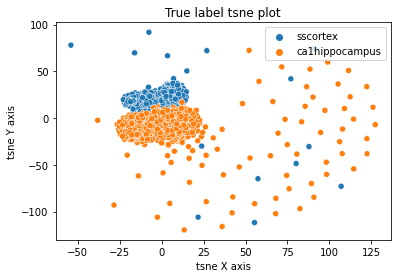

In [32]:
sns.scatterplot(x = x, y = y, hue = true_label, legend = "full", palette = "tab10")

plt.xlabel('tsne X axis')
plt.ylabel('tsne Y axis')
plt.title('True label tsne plot')

plt.show()

In [33]:
def calculateAccuracy(true_label, predicted_label):
    return sum(1 for x,y in zip(true_label,predicted_label) if x == y) / len(true_label)

def assignLabels(true_label,predicted_label):
    num_labels = len(true_label)
#     d = {}
#     new_predicted_label = []
    
#     for i in range(num_labels):
#         if d.get(predicted_label[i]) == None :
#             d[predicted_label[i]] = []
        
#         d[predicted_label[i]].append(true_label[i])
    
#     for key in d:
#         d[key] = max(d[key],key=d[key].count)
        
#     for i in range(num_labels):
#         new_predicted_label.append(d[predicted_label[i]])
#     return new_predicted_label

    new_label1 = copy.deepcopy(predicted_label).astype('object')
    new_label2 = copy.deepcopy(predicted_label).astype('object')
    
    new_label1[new_label1 == 1] = 'sscortex'
    new_label1[new_label1 == 0] = 'ca1hippocampus'
    
    new_label2[new_label2 == 1] = 'ca1hippocampus'
    new_label2[new_label2 == 0] = 'sscortex'
    
    if calculateAccuracy(true_label, new_label1) > calculateAccuracy(true_label, new_label2):
        return new_label1
    else:
        return new_label2



accuracy = 0.9820627802690582
silhoutte score org= 0.025874121947938807
silhoutte score = 0.2333554854614071


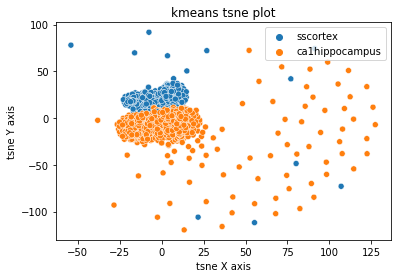

In [46]:
def kmeansCluster(X, n_clusters):
    
    kmeans = KMeans(n_clusters=n_clusters,random_state=10)
    kmeans.fit(X)
    predicted_clusters = kmeans.labels_
    
    return predicted_clusters

k_labels = kmeansCluster(X, 2)
k_labels = assignLabels(true_label, k_labels)
k_accuracy = calculateAccuracy(true_label, k_labels)
k_ss_org = ss(X_org, k_labels)
k_ss = ss(X, k_labels)
print(f'accuracy = {k_accuracy}')
print(f'silhoutte score org= {k_ss_org}')
print(f'silhoutte score = {k_ss}')
sns.scatterplot(x = x, y = y, hue = k_labels, legend = "full", palette = "tab10")
plt.xlabel('tsne X axis')
plt.ylabel('tsne Y axis')
plt.title('kmeans tsne plot')
plt.show()

accuracy = 0.9820627802690582
silhoutte score org= 0.025769026754524055
silhoutte score = 0.23293899273343588


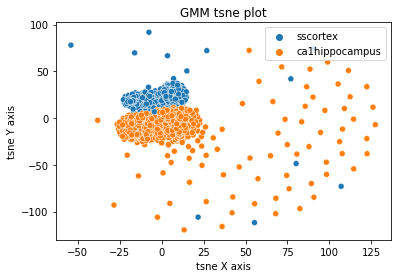

In [47]:
def softCluster(X, n_components):

    gmm = GaussianMixture(n_components=n_components)
    gmm.fit(X)
    predicted_clusters = gmm.predict(X)
    predicted_prob = gmm.predict_proba(X)

    return predicted_clusters, predicted_prob

gmm_labels,gmm_prob = softCluster(X, 2)
gmm_labels = assignLabels(true_label, gmm_labels)
gmm_accuracy = calculateAccuracy(true_label, gmm_labels)
gmm_ss_org = ss(X_org, gmm_labels)
gmm_ss = ss(X, gmm_labels)
print(f'accuracy = {k_accuracy}')
print(f'silhoutte score org= {gmm_ss_org}')
print(f'silhoutte score = {gmm_ss}')
sns.scatterplot(x = x, y = y, hue = gmm_labels, legend = "full", palette = "tab10")
plt.xlabel('tsne X axis')
plt.ylabel('tsne Y axis')
plt.title('GMM tsne plot')
plt.show()

accuracy = 0.8116591928251121
silhoutte score = 0.011513795944437842


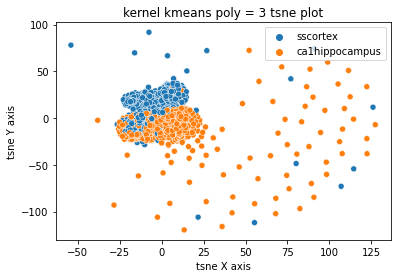

accuracy = 0.6068759342301944
silhoutte score = 0.003928978059518344


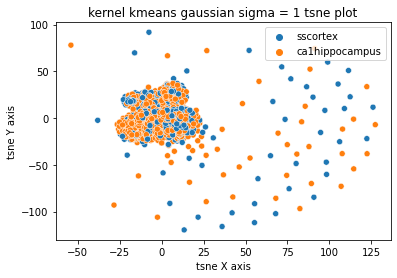

accuracy = 0.6165919282511211
silhoutte score = 0.0042042901954053285


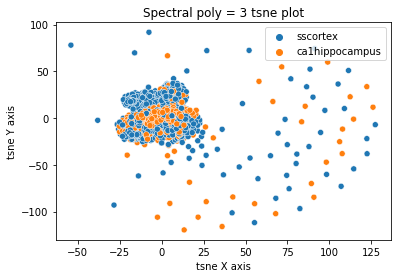

accuracy = 0.5657698056801196
silhoutte score = 0.004183083919003423


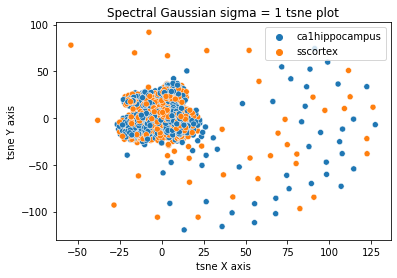

In [48]:
def findEigen(covariance_matrix):
    eigen_value,eigen_vector= np.linalg.eig(covariance_matrix)
    return eigen_value,eigen_vector

def findTopKEigenVec(eigen_vector,eigen_value,k):
    n=eigen_value.shape[0]
    highest_eigen_val_index = eigen_value.argsort()[::-1]
    w=[] #top k eigen vectors are stored
    for i in range(k):
        w.append(np.array(eigen_vector[:,highest_eigen_val_index[i]]))
        w[i]=w[i].reshape(eigen_vector.shape[1],1)
    return w

def polynomial_kernel(x,y,p):
    value=(x.transpose() @ y) + 1
    value=value**p;
    return value;

def gaussian_kernel(x,y,sigma):
    sub_val=x-y
    power_term=-(sub_val.transpose() @ sub_val)/(2*(sigma**2))
    value=np.exp(power_term)
    return value

def computePolynomilaKernelMatrix(data,polynomial):
    size=data.shape[1]
    K=np.zeros([size,size])
    for i in range(size):
        for j in range(size):
            K[i][j]=polynomial_kernel(data[:,i],data[:,j],polynomial)
    
    return K
def computeGaussianKernelMatrix(data,sigma):
    size=data.shape[1]
    K=np.zeros([size,size])
    for i in range(size):
        for j in range(size):
            K[i][j]=gaussian_kernel(data[:,i],data[:,j],sigma)
    
    return K

def KKmeans(K,kvalue):
    
    K_eigenvalue,K_eigenvector=findEigen(K)
    beta=findTopKEigenVec(K_eigenvector,K_eigenvalue,kvalue)
    
    H=np.concatenate( beta, axis=1 )
    
    indicator=np.argmax(H,axis=1)
    
    return indicator

def spectralKmeans(K,kvalue):
    
    K_eigenvalue,K_eigenvector=findEigen(K)
    beta=findTopKEigenVec(K_eigenvector,K_eigenvalue,20)
    
    H=np.concatenate( beta, axis=1 )
    
    norm=np.linalg.norm(H, axis=1)
    
    H=H.real
    for i in range(len(H)):
        H[i] = (H[i]/norm[i]) if norm[i] != 0 else 0
    
    p = kmeansCluster(H, kvalue)
    return p
    

K = computePolynomilaKernelMatrix(X.T, 3)
kk_labels = KKmeans(K, 2)
kk_labels = assignLabels(true_label, kk_labels)
kk_accuracy = calculateAccuracy(true_label, kk_labels)
kk_ss = ss(X_org, kk_labels)
print(f'accuracy = {kk_accuracy}')
print(f'silhoutte score = {kk_ss}')
sns.scatterplot(x = x, y = y, hue = kk_labels, legend = "full", palette = "tab10")
plt.xlabel('tsne X axis')
plt.ylabel('tsne Y axis')
plt.title('kernel kmeans poly = 3 tsne plot')

plt.show()



K = computeGaussianKernelMatrix(X.T, 1)
kk_labels = KKmeans(K, 2)
kk_labels = assignLabels(true_label, kk_labels)
kk_accuracy = calculateAccuracy(true_label, kk_labels)
kk_ss = ss(X_org, kk_labels)
print(f'accuracy = {kk_accuracy}')
print(f'silhoutte score = {kk_ss}')
sns.scatterplot(x = x, y = y, hue = kk_labels, legend = "full", palette = "tab10")
plt.xlabel('tsne X axis')
plt.ylabel('tsne Y axis')
plt.title('kernel kmeans gaussian sigma = 1 tsne plot')

plt.show()

K = computePolynomilaKernelMatrix(X.T, 3)
kk_labels = spectralKmeans(K, 2)
kk_labels = assignLabels(true_label, kk_labels)
kk_accuracy = calculateAccuracy(true_label, kk_labels)
kk_ss = ss(X_org, kk_labels)
print(f'accuracy = {kk_accuracy}')
print(f'silhoutte score = {kk_ss}')
sns.scatterplot(x = x, y = y, hue = kk_labels, legend = "full", palette = "tab10")
plt.xlabel('tsne X axis')
plt.ylabel('tsne Y axis')
plt.title('Spectral poly = 3 tsne plot')

plt.show()

K = computeGaussianKernelMatrix(X.T, 1)
kk_labels = spectralKmeans(K, 2)
kk_labels = assignLabels(true_label, kk_labels)
kk_accuracy = calculateAccuracy(true_label, kk_labels)
kk_ss = ss(X_org, kk_labels)
print(f'accuracy = {kk_accuracy}')
print(f'silhoutte score = {kk_ss}')
sns.scatterplot(x = x, y = y, hue = kk_labels, legend = "full", palette = "tab10")

plt.xlabel('tsne X axis')
plt.ylabel('tsne Y axis')
plt.title('Spectral Gaussian sigma = 1 tsne plot')

plt.show()

In [139]:
zeisel_logcpm = pd.read_csv("zeisel_2015_logcpm_eneurons.csv")
zeisel_anno = pd.read_csv('zeisel_2015_clean_anno_eneurons.csv')

In [140]:
data = zeisel_logcpm.iloc[: , 1:].to_numpy().T
data.shape

(1338, 19972)

In [141]:
def entropyPreprocess(data, num_components = 100, num_bins = 300, min_val = 0, max_val = 1):
    n_sample , n_feature = data.shape
    bins = np.zeros((num_bins,n_feature))
    norm_data = normalize(data, axis = 0)
    
    bin_range = np.linspace(min_val, max_val, num_bins+1)


    for k in range(num_bins):
        mask = (norm_data >= bin_range[k]) & (norm_data < bin_range[k+1])
        bins[k,:] = np.sum(mask, axis=0)


    new_data = bins
    new_data = new_data/new_data.sum(axis=0)
    entropy_data = entropy(new_data,axis=0)
    indexes = np.argsort(entropy_data)[::-1][:num_components]
    
    return data[:,indexes]

def doPCA(data, pc_components = 4):
    principal=PCA(n_components=pc_components)
    principal.fit(data)
    x=principal.transform(data)
    return x

In [153]:
preprocessed_data = entropyPreprocess(data, 100)
X = doPCA(preprocessed_data, 12)
# X = preprocessed_data

In [154]:
X.shape

(1338, 12)

accuracy = 0.9820627802690582
silhoutte score org= 0.025874121947938807
silhoutte score = 0.23343331538709733


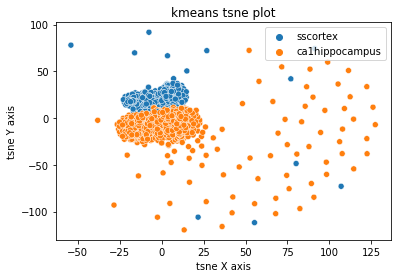

In [59]:
def kmeansCluster(X, n_clusters):
    
    kmeans = KMeans(n_clusters=n_clusters,random_state=10)
    kmeans.fit(X)
    predicted_clusters = kmeans.labels_
    
    return predicted_clusters

k_labels = kmeansCluster(X, 2)
k_labels = assignLabels(true_label, k_labels)
k_accuracy = calculateAccuracy(true_label, k_labels)
k_ss_org = ss(X_org, k_labels)
k_ss = ss(X, k_labels)
print(f'accuracy = {k_accuracy}')
print(f'silhoutte score org= {k_ss_org}')
print(f'silhoutte score = {k_ss}')
sns.scatterplot(x = x, y = y, hue = k_labels, legend = "full", palette = "tab10")
plt.xlabel('tsne X axis')
plt.ylabel('tsne Y axis')
plt.title('kmeans tsne plot')
plt.show()

accuracy = 0.9820627802690582
silhoutte score org= 0.02586061725232544
silhoutte score = 0.23330337121554087


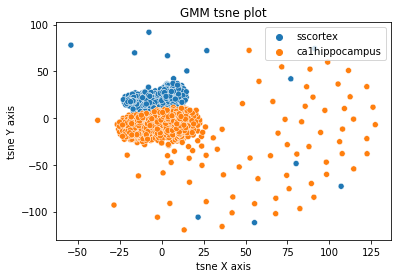

In [60]:
def softCluster(X, n_components):

    gmm = GaussianMixture(n_components=n_components)
    gmm.fit(X)
    predicted_clusters = gmm.predict(X)
    predicted_prob = gmm.predict_proba(X)

    return predicted_clusters, predicted_prob

gmm_labels,gmm_prob = softCluster(X, 2)
gmm_labels = assignLabels(true_label, gmm_labels)
gmm_accuracy = calculateAccuracy(true_label, gmm_labels)
gmm_ss_org = ss(X_org, gmm_labels)
gmm_ss = ss(X, gmm_labels)
print(f'accuracy = {k_accuracy}')
print(f'silhoutte score org= {gmm_ss_org}')
print(f'silhoutte score = {gmm_ss}')
sns.scatterplot(x = x, y = y, hue = gmm_labels, legend = "full", palette = "tab10")
plt.xlabel('tsne X axis')
plt.ylabel('tsne Y axis')
plt.title('GMM tsne plot')
plt.show()

accuracy = 0.8101644245142003
silhoutte score = 0.011512928315613073


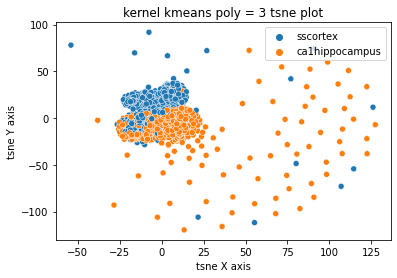

accuracy = 0.7384155455904334
silhoutte score = 0.017685758916516414


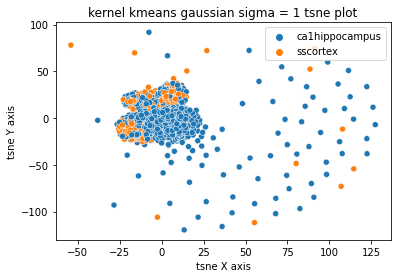

accuracy = 0.6038863976083707
silhoutte score = 0.003924354493630721


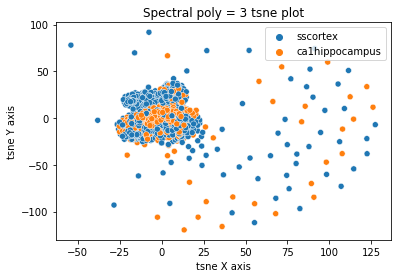

accuracy = 0.5403587443946188
silhoutte score = 0.00661205817394095


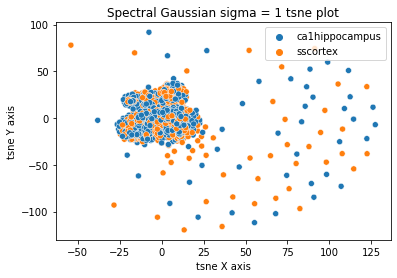

In [61]:
def findEigen(covariance_matrix):
    eigen_value,eigen_vector= np.linalg.eig(covariance_matrix)
    return eigen_value,eigen_vector

def findTopKEigenVec(eigen_vector,eigen_value,k):
    n=eigen_value.shape[0]
    highest_eigen_val_index = eigen_value.argsort()[::-1]
    w=[] #top k eigen vectors are stored
    for i in range(k):
        w.append(np.array(eigen_vector[:,highest_eigen_val_index[i]]))
        w[i]=w[i].reshape(eigen_vector.shape[1],1)
    return w

def polynomial_kernel(x,y,p):
    value=(x.transpose() @ y) + 1
    value=value**p;
    return value;

def gaussian_kernel(x,y,sigma):
    sub_val=x-y
    power_term=-(sub_val.transpose() @ sub_val)/(2*(sigma**2))
    value=np.exp(power_term)
    return value

def computePolynomilaKernelMatrix(data,polynomial):
    size=data.shape[1]
    K=np.zeros([size,size])
    for i in range(size):
        for j in range(size):
            K[i][j]=polynomial_kernel(data[:,i],data[:,j],polynomial)
    
    return K
def computeGaussianKernelMatrix(data,sigma):
    size=data.shape[1]
    K=np.zeros([size,size])
    for i in range(size):
        for j in range(size):
            K[i][j]=gaussian_kernel(data[:,i],data[:,j],sigma)
    
    return K

def KKmeans(K,kvalue):
    
    K_eigenvalue,K_eigenvector=findEigen(K)
    beta=findTopKEigenVec(K_eigenvector,K_eigenvalue,kvalue)
    
    H=np.concatenate( beta, axis=1 )
    
    indicator=np.argmax(H,axis=1)
    
    return indicator

def spectralKmeans(K,kvalue):
    
    K_eigenvalue,K_eigenvector=findEigen(K)
    beta=findTopKEigenVec(K_eigenvector,K_eigenvalue,20)
    
    H=np.concatenate( beta, axis=1 )
    
    norm=np.linalg.norm(H, axis=1)
    
    H=H.real
    for i in range(len(H)):
        H[i] = (H[i]/norm[i]) if norm[i] != 0 else 0
    
    p = kmeansCluster(H, kvalue)
    return p
    

K = computePolynomilaKernelMatrix(X.T, 3)
kk_labels = KKmeans(K, 2)
kk_labels = assignLabels(true_label, kk_labels)
kk_accuracy = calculateAccuracy(true_label, kk_labels)
kk_ss = ss(X_org, kk_labels)
print(f'accuracy = {kk_accuracy}')
print(f'silhoutte score = {kk_ss}')
sns.scatterplot(x = x, y = y, hue = kk_labels, legend = "full", palette = "tab10")
plt.xlabel('tsne X axis')
plt.ylabel('tsne Y axis')
plt.title('kernel kmeans poly = 3 tsne plot')

plt.show()



K = computeGaussianKernelMatrix(X.T, 1)
kk_labels = KKmeans(K, 2)
kk_labels = assignLabels(true_label, kk_labels)
kk_accuracy = calculateAccuracy(true_label, kk_labels)
kk_ss = ss(X_org, kk_labels)
print(f'accuracy = {kk_accuracy}')
print(f'silhoutte score = {kk_ss}')
sns.scatterplot(x = x, y = y, hue = kk_labels, legend = "full", palette = "tab10")
plt.xlabel('tsne X axis')
plt.ylabel('tsne Y axis')
plt.title('kernel kmeans gaussian sigma = 1 tsne plot')

plt.show()

K = computePolynomilaKernelMatrix(X.T, 3)
kk_labels = spectralKmeans(K, 2)
kk_labels = assignLabels(true_label, kk_labels)
kk_accuracy = calculateAccuracy(true_label, kk_labels)
kk_ss = ss(X_org, kk_labels)
print(f'accuracy = {kk_accuracy}')
print(f'silhoutte score = {kk_ss}')
sns.scatterplot(x = x, y = y, hue = kk_labels, legend = "full", palette = "tab10")
plt.xlabel('tsne X axis')
plt.ylabel('tsne Y axis')
plt.title('Spectral poly = 3 tsne plot')

plt.show()

K = computeGaussianKernelMatrix(X.T, 1)
kk_labels = spectralKmeans(K, 2)
kk_labels = assignLabels(true_label, kk_labels)
kk_accuracy = calculateAccuracy(true_label, kk_labels)
kk_ss = ss(X_org, kk_labels)
print(f'accuracy = {kk_accuracy}')
print(f'silhoutte score = {kk_ss}')
sns.scatterplot(x = x, y = y, hue = kk_labels, legend = "full", palette = "tab10")

plt.xlabel('tsne X axis')
plt.ylabel('tsne Y axis')
plt.title('Spectral Gaussian sigma = 1 tsne plot')

plt.show()

In [31]:
num_runs = 20
accuracy_list = []
ss_list = []
for i in range(num_runs):
    print(i)
    preprocessed_data = entropyPreprocess(data, 100, 50*(i+1))
    X = doPCA(preprocessed_data, 12)
    k_labels = kmeansCluster(X, 2)
    k_labels = assignLabels(true_label, k_labels)
    k_accuracy = calculateAccuracy(true_label, k_labels)
    k_ss = ss(X, k_labels)
    
    accuracy_list.append(k_accuracy)
    ss_list.append(k_ss)


0
1
2
3
4


KeyboardInterrupt: 

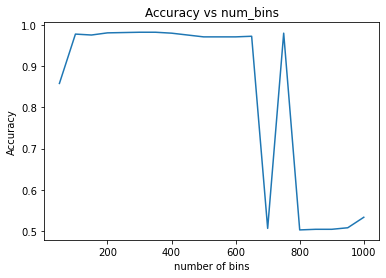

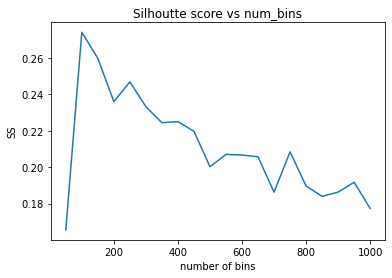

In [161]:
p = [50*(i+1) for i in range(num_runs)]

plt.plot(p,accuracy_list)
plt.xlabel('number of bins')
plt.ylabel('Accuracy')
plt.title('Accuracy vs num_bins')
plt.show()

plt.plot(p,ss_list)
plt.xlabel('number of bins')
plt.ylabel('SS')
plt.title('Silhoutte score vs num_bins')
plt.show()

In [138]:
accuracy_list[5]

NameError: name 'accuracy_list' is not defined

0.9828101644245142


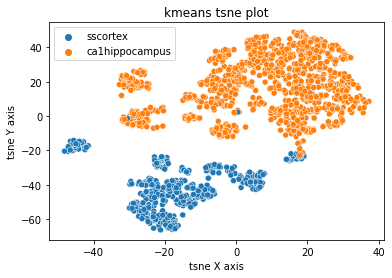

0.9835575485799701


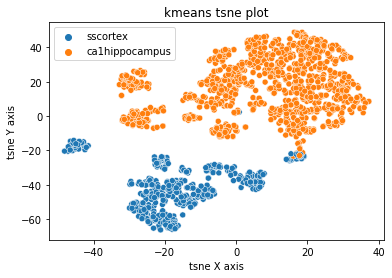

0.9805680119581465


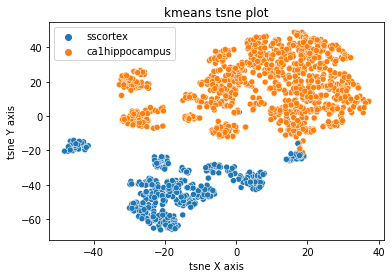

0.9798206278026906


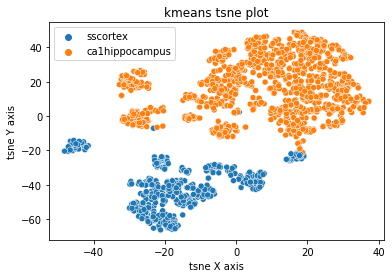

0.9798206278026906


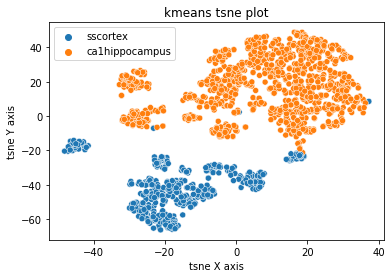

0.9798206278026906


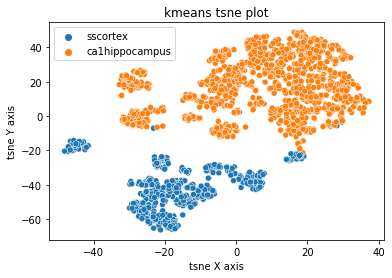

0.9783258594917787


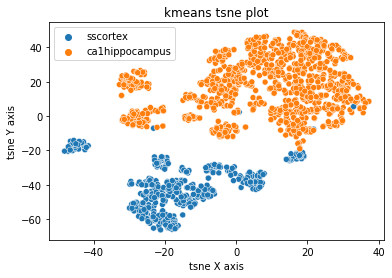

0.9790732436472347


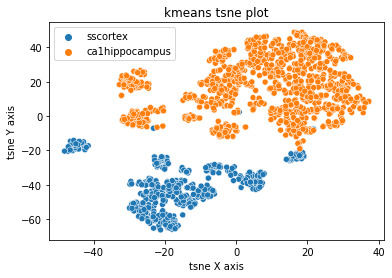

0.9798206278026906


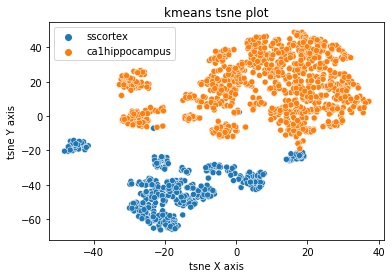

0.9671150971599403


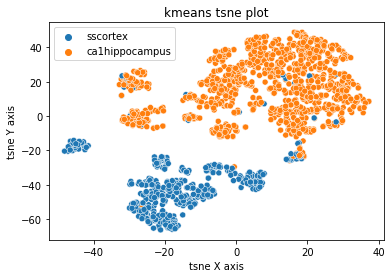

0.8998505231689088


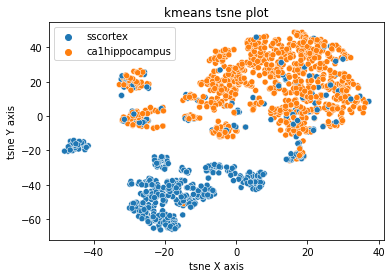

0.7436472346786248


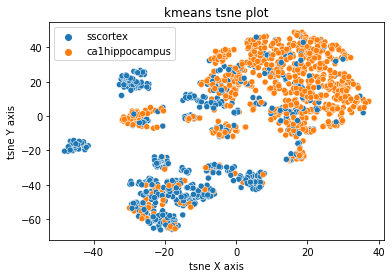

0.5037369207772795


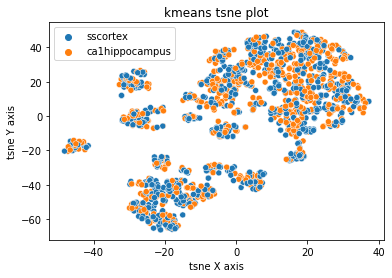

0.5037369207772795


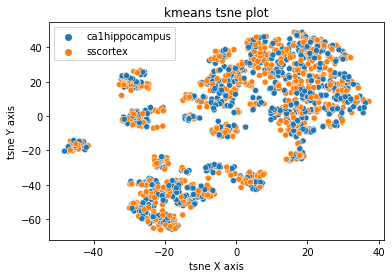

0.5426008968609866


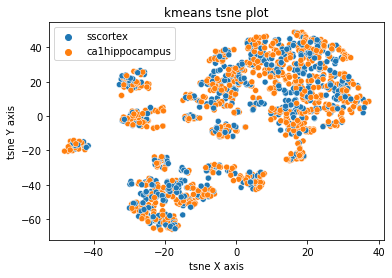

0.5171898355754858


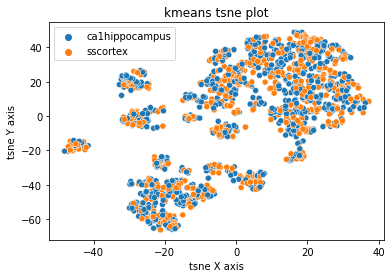

0.5067264573991032


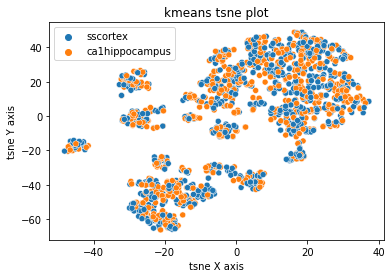

0.5059790732436472


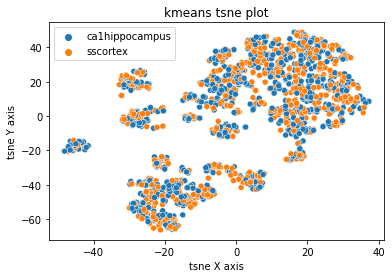

0.5186846038863976


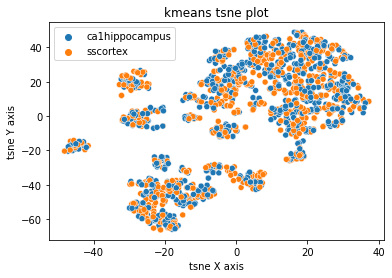

0.5014947683109118


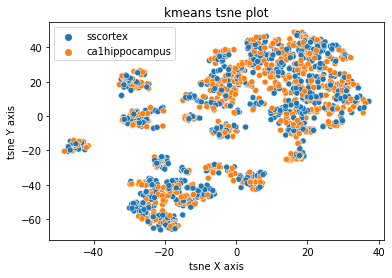

In [45]:
num_runs = 20
np.random.seed(55)
accuracy_noisy_list = []
ss_noisy_list = []
for i in range(num_runs):
    noise = np.random.normal(1,i/40,data.shape)
    noisy_data = data + noise
    preprocessed_data = entropyPreprocess(noisy_data, 100, 300)
    X = doPCA(preprocessed_data, 12)
    k_labels = kmeansCluster(X, 2)
    k_labels = assignLabels(true_label, k_labels)
    k_accuracy = calculateAccuracy(true_label, k_labels)
    print(k_accuracy)

    
    accuracy_noisy_list.append(k_accuracy)
    sns.scatterplot(x = x, y = y, hue = k_labels, legend = "full", palette = "tab10")
    plt.xlabel('tsne X axis')
    plt.ylabel('tsne Y axis')
    plt.title('kmeans tsne plot')
    plt.show()
    


In [ ]:
num_runs = 20
np.random.seed(55)
accuracy_noisy_list = []
ss_noisy_list = []
for i in range(num_runs):
    noise = np.random.normal(1,i/40,data.shape)
    noisy_data = data + noise
    preprocessed_data = entropyPreprocess(noisy_data, 100, 300)
    X = doPCA(preprocessed_data, 12)
    k_labels = kmeansCluster(X, 2)
    k_labels = assignLabels(true_label, k_labels)
    k_accuracy = calculateAccuracy(true_label, k_labels)
    print(k_accuracy)

    
    accuracy_noisy_list.append(k_accuracy)
    sns.scatterplot(x = x, y = y, hue = k_labels, legend = "full", palette = "tab10")
    plt.xlabel('tsne X axis')
    plt.ylabel('tsne Y axis')
    plt.title('kmeans tsne plot')
    plt.show()

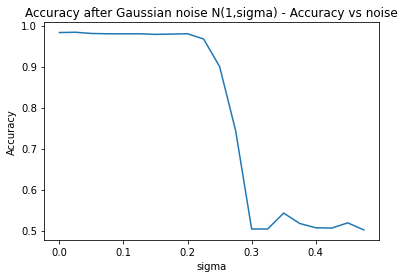

In [49]:
q = [i/40 for i in range(num_runs)]

plt.plot(q,accuracy_noisy_list)
plt.xlabel('sigma')
plt.ylabel('Accuracy')
plt.title('Accuracy after Gaussian noise N(1,sigma) - Accuracy vs noise')
plt.show()

# plt.plot(q,ss_noisy_list)
# plt.xlabel('sigma')
# plt.ylabel('SS')
# plt.title('Silhoutte score after Gaussian noise N(0,sigma) - Silhoutte score vs noise')
# plt.show()


0.9828101644245142


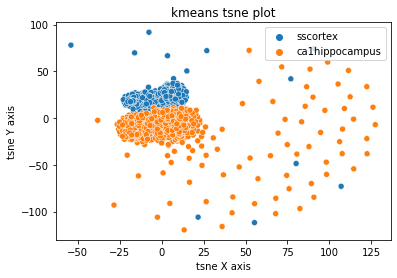

0.9820627802690582


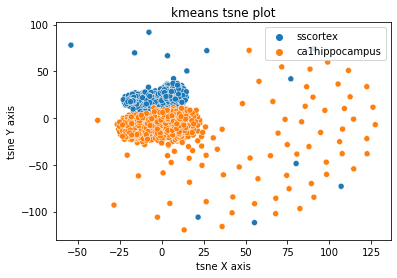

0.9820627802690582


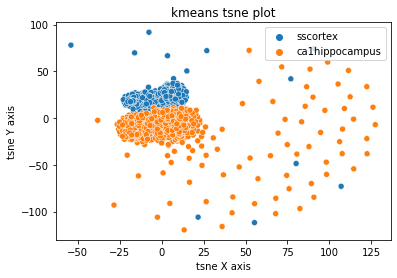

0.9835575485799701


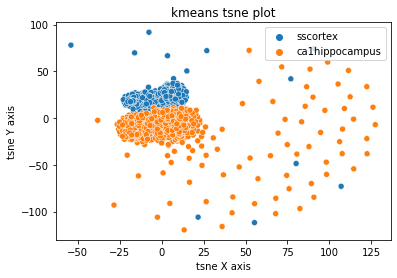

0.9813153961136024


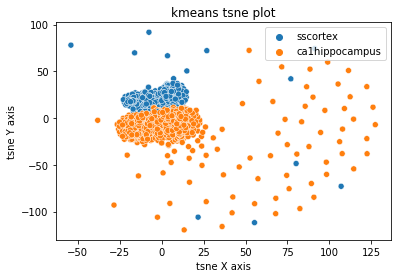

0.9820627802690582


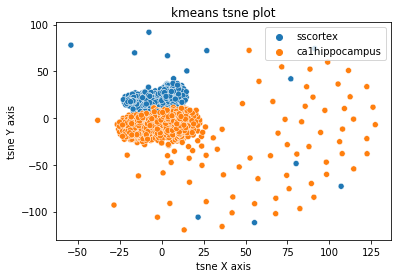

0.9805680119581465


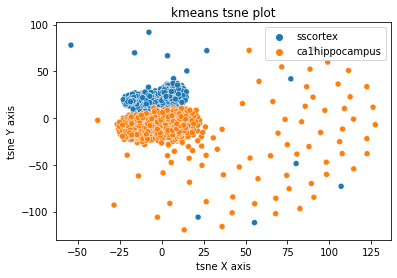

0.9813153961136024


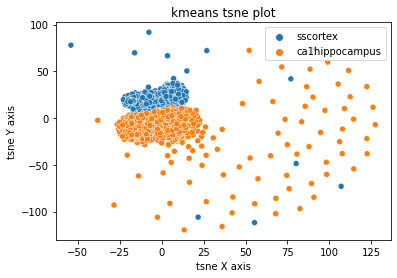

0.9820627802690582


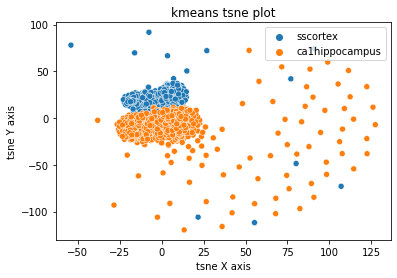

0.9828101644245142


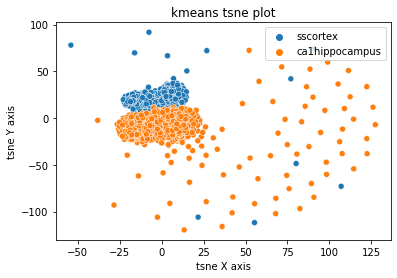

0.9828101644245142


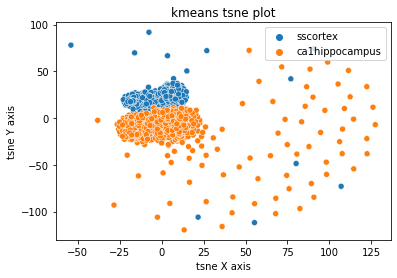

0.9820627802690582


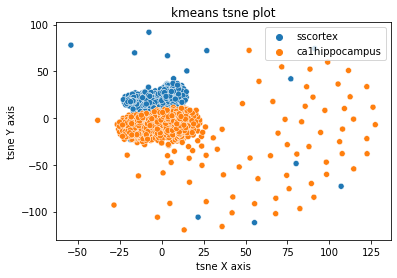

0.9835575485799701


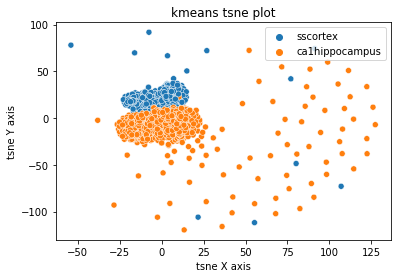

/tmp/ipykernel_64454/552182813.py:15: RuntimeWarning: invalid value encountered in true_divide
  new_data = new_data/new_data.sum(axis=0)


0.9775784753363229


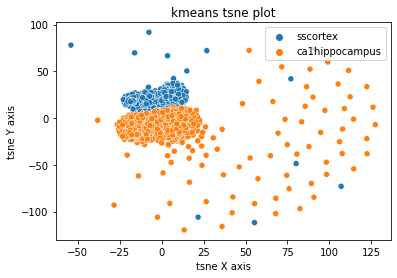

0.9798206278026906


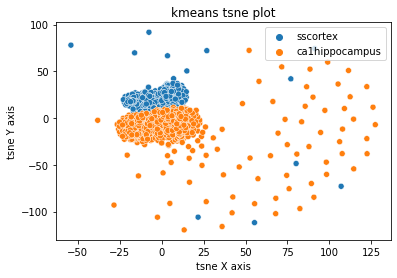

/tmp/ipykernel_64454/552182813.py:15: RuntimeWarning: invalid value encountered in true_divide
  new_data = new_data/new_data.sum(axis=0)


0.9857997010463379


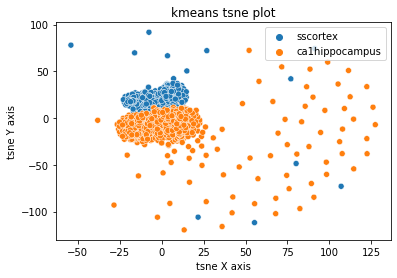

/tmp/ipykernel_64454/552182813.py:15: RuntimeWarning: invalid value encountered in true_divide
  new_data = new_data/new_data.sum(axis=0)


0.9753363228699552


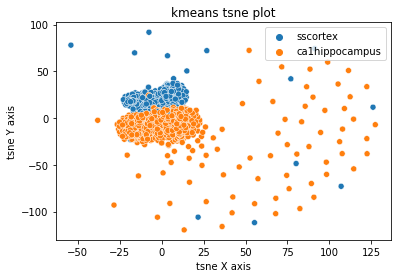

/tmp/ipykernel_64454/552182813.py:15: RuntimeWarning: invalid value encountered in true_divide
  new_data = new_data/new_data.sum(axis=0)


0.882660687593423


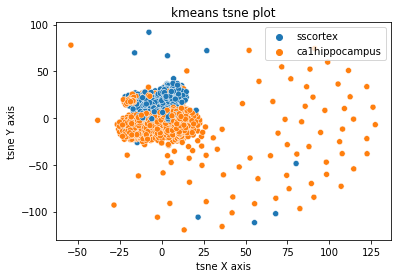

/tmp/ipykernel_64454/552182813.py:15: RuntimeWarning: invalid value encountered in true_divide
  new_data = new_data/new_data.sum(axis=0)


0.7010463378176383


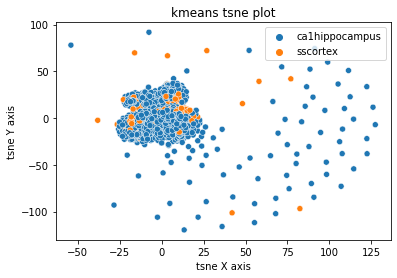

/tmp/ipykernel_64454/552182813.py:15: RuntimeWarning: invalid value encountered in true_divide
  new_data = new_data/new_data.sum(axis=0)


0.5022421524663677


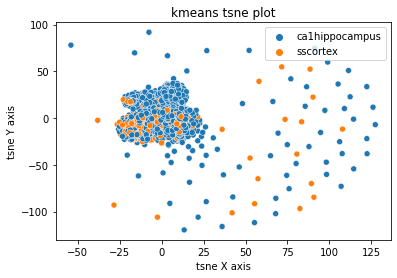

In [152]:
num_runs = 20
np.random.seed(55)
accuracy_noisy_list = []
ss_noisy_list = []
for i in range(num_runs):
    noise = np.random.normal(1,i/40,data.shape[1])
    noisy_data = data + noise
    preprocessed_data = entropyPreprocess(noisy_data, 100, 300)
    X = doPCA(preprocessed_data, 12)
    k_labels = kmeansCluster(X, 2)
    k_labels = assignLabels(true_label, k_labels)
    k_accuracy = calculateAccuracy(true_label, k_labels)
    print(k_accuracy)

    
    accuracy_noisy_list.append(k_accuracy)
    sns.scatterplot(x = x, y = y, hue = k_labels, legend = "full", palette = "tab10")
    plt.xlabel('tsne X axis')
    plt.ylabel('tsne Y axis')
    plt.title('kmeans tsne plot')
    plt.show()

In [ ]:
q = [i/40 for i in range(num_runs)]

plt.plot(q,accuracy_noisy_list)
plt.xlabel('sigma')
plt.ylabel('Accuracy')
plt.title('Accuracy after Gaussian noise N(1,sigma) - Accuracy vs noise')
plt.show()

In [71]:
noise = np.random.normal(0,0.1,data.shape)
noise[noise <= 0] = 0
noisy_data = data + noise
preprocessed_data = entropyPreprocess(noisy_data, 100, 300)
X = doPCA(preprocessed_data, 12)
k_labels = kmeansCluster(X, 2)
k_labels = assignLabels(true_label, k_labels)
k_accuracy = calculateAccuracy(true_label, k_labels)
print(k_accuracy)

0.5112107623318386


In [62]:
# zeisel_2015_hicat_clusters
zeisel_hicat_clusters = pd.read_csv("zeisel_2015_hicat_clusters.csv")

In [102]:
# zeisel_hicat_clusters.shape
hicat_labels = np.array(zeisel_hicat_clusters.iloc[:, 1])
hicat_labels[hicat_labels == 2] = 0 
hicat_labels = assignLabels(true_label, hicat_labels)
k_accuracy = calculateAccuracy(true_label, hicat_labels)

k_ss_org = ss(X_org, k_labels)
k_ss = ss(X, k_labels)
print(f'accuracy = {k_accuracy}')
print(f'silhoutte score org= {k_ss_org}')
print(f'silhoutte score = {k_ss}')


accuracy = 0.9783258594917787
silhoutte score org= 0.025874121947938807
silhoutte score = -0.007024132857196296


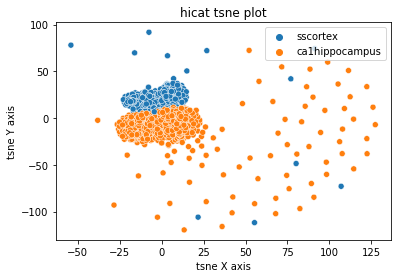

In [103]:
sns.scatterplot(x = x, y = y, hue = hicat_labels, legend = "full", palette = "tab10")
plt.xlabel('tsne X axis')
plt.ylabel('tsne Y axis')
plt.title('hicat tsne plot')
plt.show()

In [104]:
import numpy as np
import matplotlib.pyplot as plt

num_clust = 2

labels_x = true_label
labels_y = hicat_labels






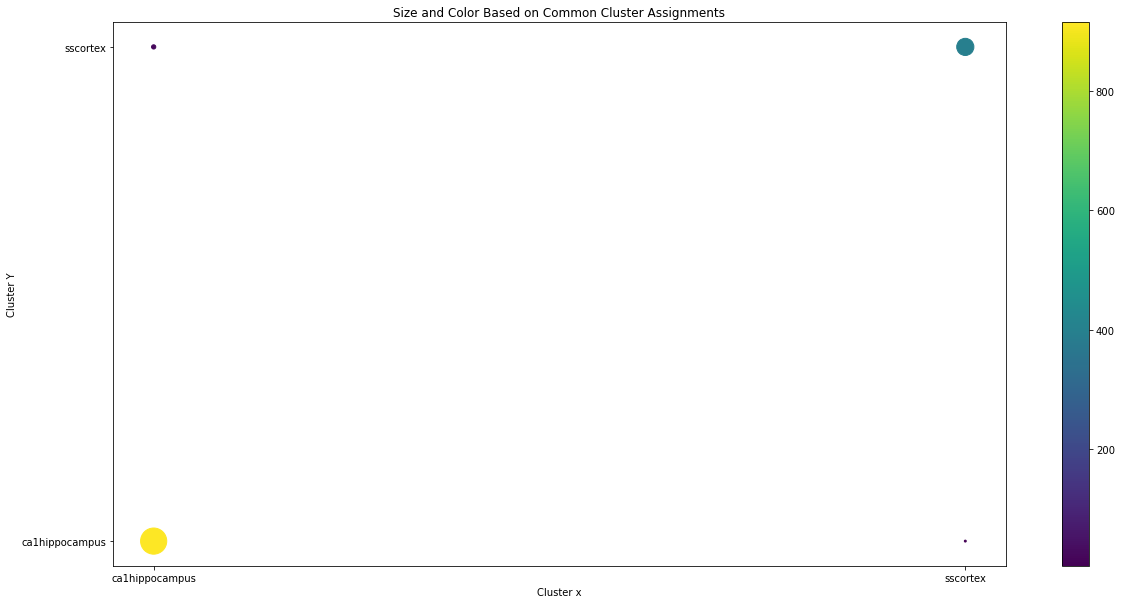

In [137]:
import numpy as np
import matplotlib.pyplot as plt


n = len(true_label)
labels_x = true_label
labels_y = hicat_labels
k = 2 


unique_values_x = np.unique(labels_x)
unique_values_y = np.unique(labels_y)


# Compute the number of rows with common cluster assignments for each (x,y) pair
n_common = np.zeros((k,k))
# for i in range(k):
#     for j in range(k):
#         for m in range(n):  
#             if labels_x[m] == unique_values_x[i] and labels_x[m]

for i in range(n):
    p, = np.where(unique_values_x == labels_x[i])
    q, = np.where(unique_values_y == labels_y[i])
    
    n_common[p[0]][q[0]]+=1
        
# Create a scatter plot where point size and color are based on the number of rows with common cluster assignments
s = 1000 * n_common.flatten() / np.sum(n_common)
c = n_common.flatten()
x_ticklabels = unique_values_x
y_ticklabels = unique_values_y
plt.figure(figsize=(20, 10))
plt.scatter(np.repeat(np.arange(k), k), np.tile(np.arange(k), k), s=s, c=c, cmap='viridis')
plt.xticks(np.arange(k), x_ticklabels)
plt.yticks(np.arange(k), y_ticklabels)
plt.xlabel('Cluster x')
plt.ylabel('Cluster Y')
plt.title('Size and Color Based on Common Cluster Assignments')
plt.colorbar()
plt.show()


In [136]:
n_common

array([[  0., 939.],
       [  0., 399.]])

True

In [132]:
unique_values_y

array(['ca1hippocampus', 'sscortex'], dtype=object)

iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14


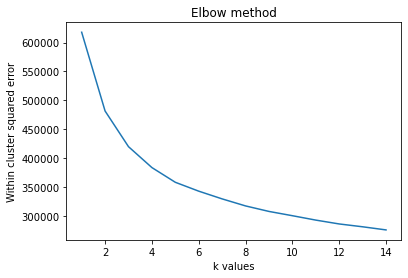

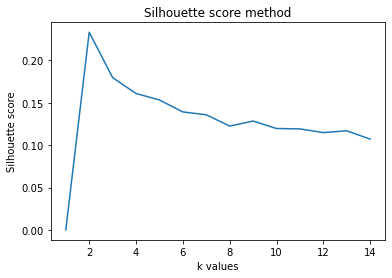

In [150]:
def plotElbow(X):
    # elbow method
    wcss = []
    ss_scores = []
    start = 1
    end = 15
    for i in range(start,end): 
      kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 4)
      kmeans.fit(X) 
      wcss.append(kmeans.inertia_)
      if i == 1:
            ss_val = 0
      else:
          ss_val = ss(X_org, kmeans.labels_)
      ss_scores.append(ss_val)
      print(f'iter {i}')
    
    k_values = [i  for i in range(start,end)]
    plt.plot(k_values, wcss)
    plt.xlabel('k values')
    plt.ylabel('Within cluster squared error')
    plt.title('Elbow method')
    plt.show()
    plt.xlabel('k values')
    plt.ylabel('Silhouette score')
    plt.title('Silhouette score method')
    plt.plot(k_values, ss_scores)
    plt.show()


preprocessed_data = entropyPreprocess(data, 100)
X = doPCA(preprocessed_data, 12)
plotElbow(X)

iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14


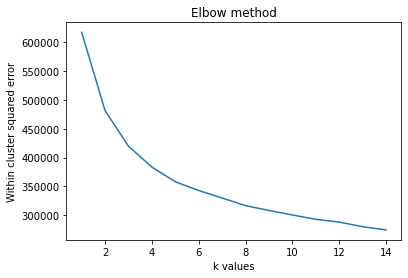

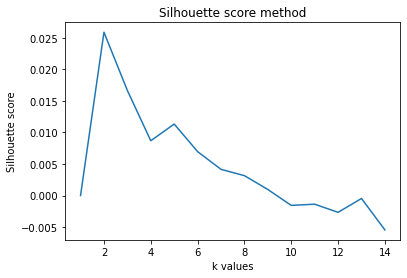

In [151]:
def plotElbow(X):
    # elbow method
    wcss = []
    ss_scores = []
    start = 1
    end = 15
    for i in range(start,end): 
      kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 4)
      kmeans.fit(X) 
      wcss.append(kmeans.inertia_)
      if i == 1:
            ss_val = 0
      else:
          ss_val = ss(X_org, kmeans.labels_)
      ss_scores.append(ss_val)
      print(f'iter {i}')
    
    k_values = [i  for i in range(start,end)]
    plt.plot(k_values, wcss)
    plt.xlabel('k values')
    plt.ylabel('Within cluster squared error')
    plt.title('Elbow method')
    plt.show()
    plt.xlabel('k values')
    plt.ylabel('Silhouette score')
    plt.title('Silhouette score method')
    plt.plot(k_values, ss_scores)
    plt.show()


preprocessed_data = entropyPreprocess(data, 100)
X = doPCA(preprocessed_data, 12)
plotElbow(X)

silhoutte score org= 0.011393018400028161
silhoutte score = 0.15412296539705161


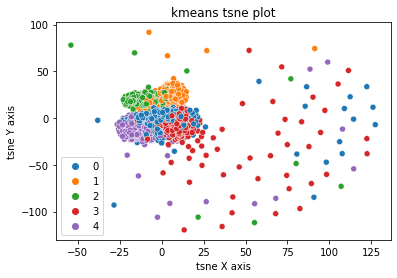

In [155]:
def kmeansCluster(X, n_clusters):
    
    kmeans = KMeans(n_clusters=n_clusters,random_state=10)
    kmeans.fit(X)
    predicted_clusters = kmeans.labels_
    
    return predicted_clusters

k_labels = kmeansCluster(X, 5)
# k_labels = assignLabels(true_label, k_labels)
# k_accuracy = calculateAccuracy(true_label, k_labels)
k_ss_org = ss(X_org, k_labels)
k_ss = ss(X, k_labels)
# print(f'accuracy = {k_accuracy}')
print(f'silhoutte score org= {k_ss_org}')
print(f'silhoutte score = {k_ss}')
sns.scatterplot(x = x, y = y, hue = k_labels, legend = "full", palette = "tab10")
plt.xlabel('tsne X axis')
plt.ylabel('tsne Y axis')
plt.title('kmeans tsne plot')
plt.show()

silhoutte score org= 0.0022407653948049145
silhoutte score = 0.12880933957244403


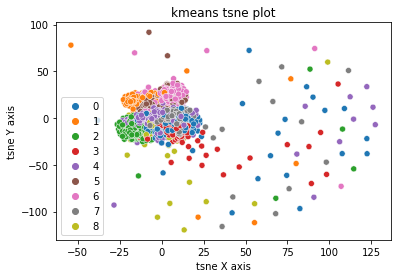

In [165]:
def kmeansCluster(X, n_clusters):
    
    kmeans = KMeans(n_clusters=n_clusters,random_state=10)
    kmeans.fit(X)
    predicted_clusters = kmeans.labels_
    
    return predicted_clusters

k_labels = kmeansCluster(X, 9)
# k_labels = assignLabels(true_label, k_labels)
# k_accuracy = calculateAccuracy(true_label, k_labels)
k_ss_org = ss(X_org, k_labels)
k_ss = ss(X, k_labels)
# print(f'accuracy = {k_accuracy}')
print(f'silhoutte score org= {k_ss_org}')
print(f'silhoutte score = {k_ss}')
sns.scatterplot(x = x, y = y, hue = k_labels, legend = "full", palette = "tab10")
plt.xlabel('tsne X axis')
plt.ylabel('tsne Y axis')
plt.title('kmeans tsne plot')
plt.show()